<h2>GLOBAL SOLUTION - 11/2024</h2>

- Gabriel Moura - 93940 
- Heitor Mancini - 94288

In [2]:
import pandas as pd
import folium
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


<h2>DATASET - VEs registrados nos EUA.</h2>
Vamos iniciar a análise explorátoria básica, para entendermos melhor o que esse dataset nos oferece.

In [3]:
data_ve = pd.read_csv('./Electric_Vehicle_Population_Data.csv')

In [4]:
data_ve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
data_ve.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


Visto isso, acreditamos que um mapa mostrando visualmente os pontos que mais existem VEs nos EUA seria ótimo para um estudo de demanda para carregadores deste tipo de veículos.

In [6]:
data_ve['Latitude'] = data_ve['Vehicle Location'].str.extract(r'POINT \((-?\d+\.\d+)\s-?\d+\.\d+\)')[0].astype(float)
data_ve['Longitude'] = data_ve['Vehicle Location'].str.extract(r'POINT \(-?\d+\.\d+\s(-?\d+\.\d+)\)')[0].astype(float)

mapa = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Coordenadas centrais dos EUA

for _, row in data_ve.dropna(subset=['Latitude', 'Longitude']).iterrows():
    folium.CircleMarker(
        location=[row['Longitude'], row['Latitude']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.7
    ).add_to(mapa)

In [7]:
display(mapa)

Com esse mapa, conseguimos identificar que, de fato, o foco está em Washintown, mas também há vários outros em diferetes cidades e estados espalhados pelos EUA. E se visualizarmos de uma outra forma, matematicamente, em um gráfico?

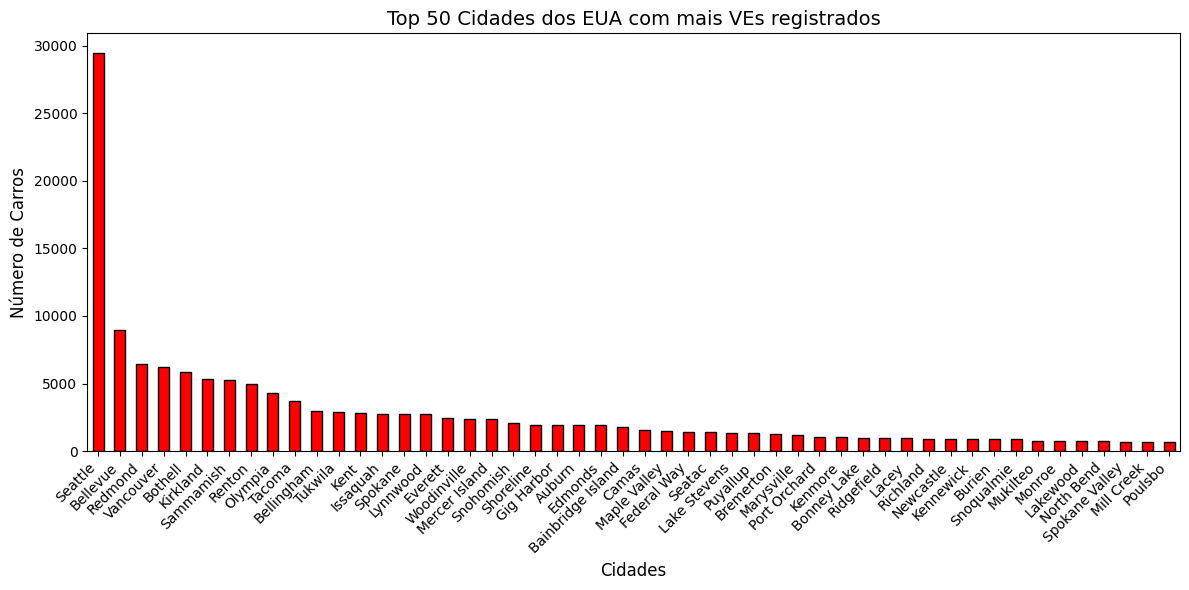

In [8]:
cidade_carros = data_ve['City'].value_counts().head(50)

plt.figure(figsize=(12, 6))
cidade_carros.plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 50 Cidades dos EUA com mais VEs registrados', fontsize=14)
plt.xlabel('Cidades', fontsize=12)
plt.ylabel('Número de Carros', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

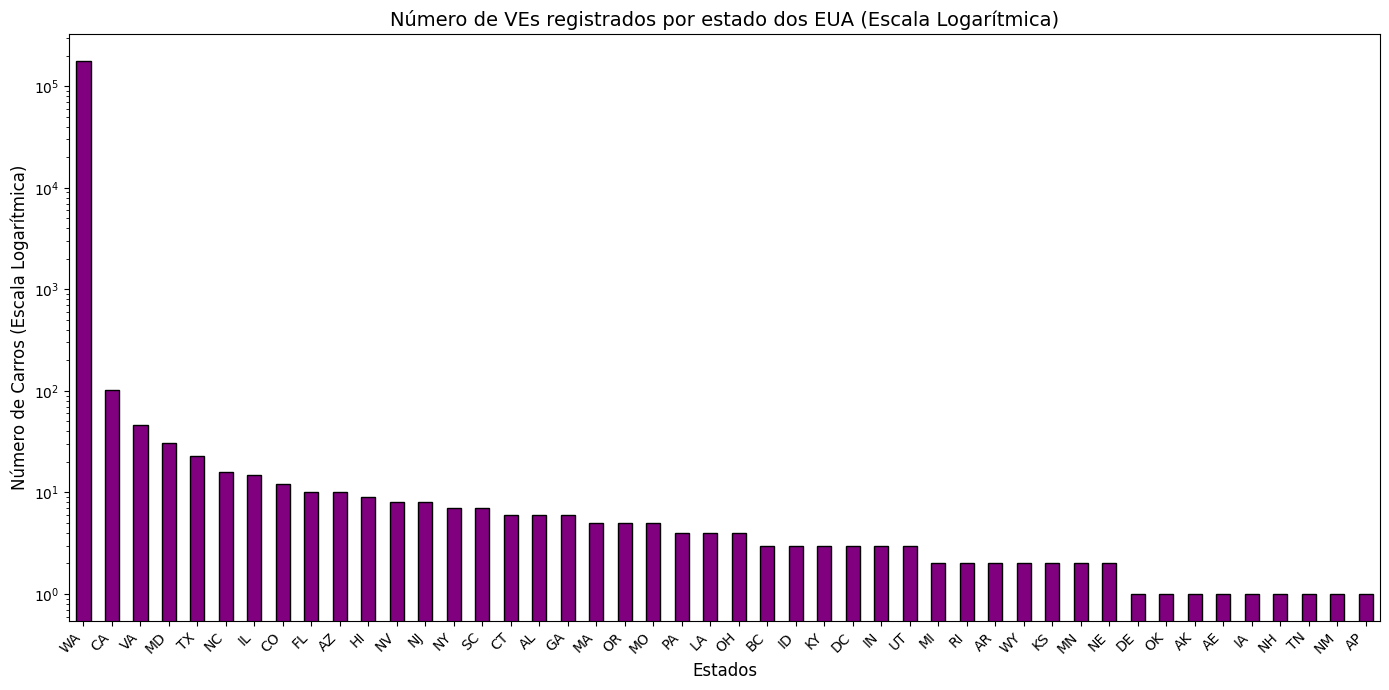

In [9]:
estado_carros = data_ve['State'].value_counts().head(50)

plt.figure(figsize=(14, 7))
estado_carros.plot(kind='bar', color='purple', edgecolor='black')
plt.yscale('log')
plt.title('Número de VEs registrados por estado dos EUA (Escala Logarítmica)', fontsize=14)
plt.xlabel('Estados', fontsize=12)
plt.ylabel('Número de Carros (Escala Logarítmica)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()



Certo, agora temos uma visão clara de estado e cidades com o maior númeor de VEs registrados.

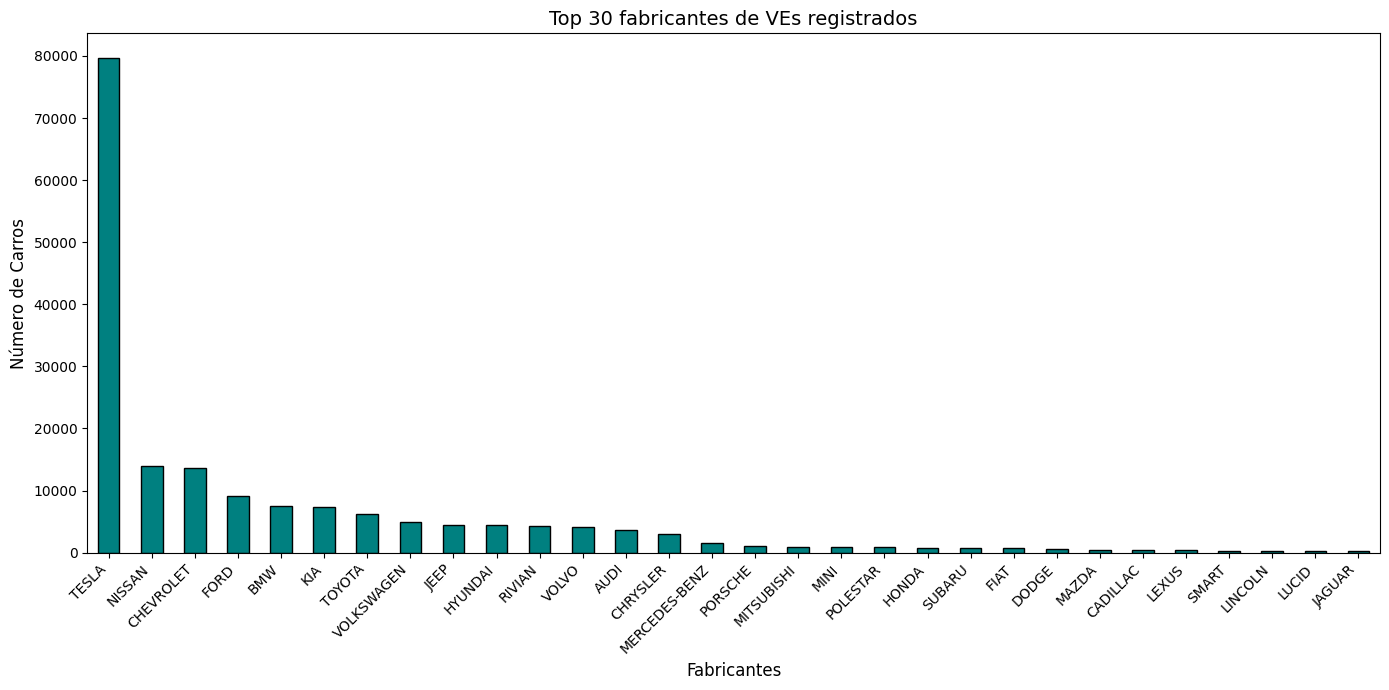

In [10]:
make_carros = data_ve['Make'].value_counts().head(30) 

plt.figure(figsize=(14, 7))
make_carros.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Top 30 fabricantes de VEs registrados', fontsize=14)
plt.xlabel('Fabricantes', fontsize=12)
plt.ylabel('Número de Carros', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


Podemos notar que a Tesla está disparada, comparada com as outras fabricantes. Isso não quer dizer que apenas ela deve se preocupar com carregadores espalhados pelos EUA para seus clientes.

Uma visualização de onde cada marca possui mais carros:

In [11]:
top_make_location = data_ve.groupby(['Make', 'State', 'City']).size().reset_index(name='Count')
top_make_location = top_make_location.loc[top_make_location.groupby('Make')['Count'].idxmax()]

top_make_location[['Make', 'State', 'City', 'Count']].reset_index(drop=True)


,Make,State,City,Count
0,ALFA ROMEO,WA,Seattle,9
1,AUDI,WA,Seattle,927
2,AZURE DYNAMICS,WA,Seattle,3
3,BENTLEY,WA,Mukilteo,1
4,BMW,WA,Seattle,1608
5,CADILLAC,WA,Seattle,38
6,CHEVROLET,WA,Seattle,2280
7,CHRYSLER,WA,Renton,383
8,DODGE,WA,Tukwila,539
9,FIAT,WA,Seattle,215


E agora o contrário, onde a marca não possui nenhum carro:

In [12]:
estados = data_ve['State'].unique()
marcas = data_ve['Make'].unique()
resultados = []

for marca in marcas:
    estados_com_veiculos = data_ve[data_ve['Make'] == marca]['State'].unique()
    estados_faltando = [estado for estado in estados if estado not in estados_com_veiculos]
    if estados_faltando:
        resultados.append({'Marca': marca, 'Estados sem Carros': ', '.join(estados_faltando)})

tabela_resultados = pd.DataFrame(resultados)

tabela_resultados


,Marca,Estados sem Carros
0,TESLA,"KY, NE, MI, RI, OK, NM, AP"
1,FORD,"DC, PA, IL, MO, GA, NE, AL, AZ, NJ, MA, IN, HI..."
2,NISSAN,"NV, NC, KY, PA, MO, NE, AL, NY, NJ, MA, IN, HI..."
3,KIA,"NV, DC, KY, PA, MD, IL, TX, MO, GA, AL, AZ, NJ..."
4,BMW,"NV, DC, KY, PA, IL, TX, MO, NE, AL, NY, AZ, NJ..."
5,CHEVROLET,"DC, NC, KY, PA, IL, MO, GA, NE, NY, IN, DE, LA..."
6,AUDI,"NV, DC, NC, KY, PA, VA, TX, MO, GA, NE, AL, NY..."
7,SMART,"NV, DC, CA, NC, KY, PA, VA, MD, IL, TX, MO, GA..."
8,VOLKSWAGEN,"NV, DC, NC, PA, TX, MO, NE, NY, NJ, MA, IN, HI..."
9,TOYOTA,"NV, DC, KY, PA, IL, MO, NE, AZ, MA, IN, UT, DE..."


<h2>DATASET 2 - Foco no carregamento em si</h2>
Vamos utilizar um outro dataset, para vermos o que conseguimos extrair dele.

In [13]:
data_charging = pd.read_csv('./station_data_dataverse.csv')

In [14]:
data_charging.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


Olhando os dados disponíveis desse dataset, percebemos que podemos ter uma visualização muito boa de demanda vs preço.

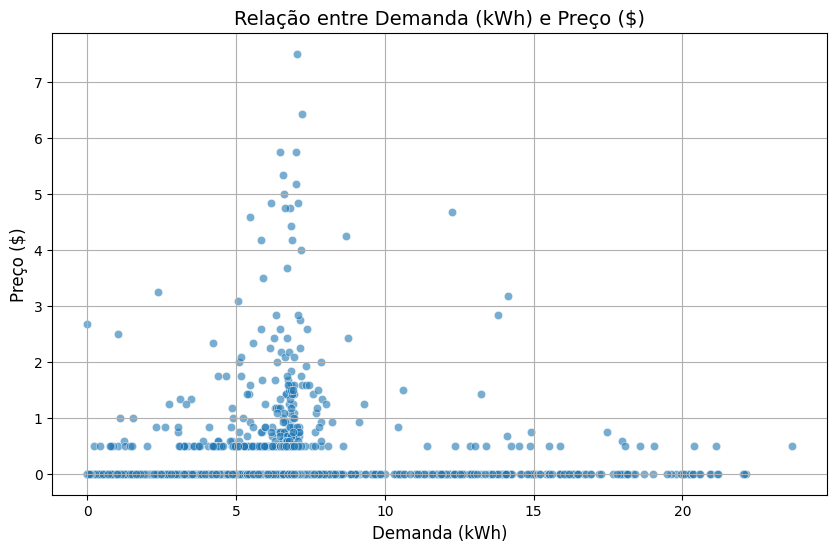

In [15]:
data_cleaned = data_charging.dropna(subset=['kwhTotal', 'dollars'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='kwhTotal', y='dollars', alpha=0.6)

plt.title('Relação entre Demanda (kWh) e Preço ($)', fontsize=14)
plt.xlabel('Demanda (kWh)', fontsize=12)
plt.ylabel('Preço ($)', fontsize=12)
plt.grid(True)
plt.show()

Outra análise que podemos fazer, é sobre a quantidade de energia consumida para cara carregamento.

In [16]:
data_charging['Events'] = range(1, len(data_charging) + 1)

fig = px.line(
    data_charging, 
    x="Events",
    y="kwhTotal",
    labels={
        "Events": "Carregamento de VEs", 
        "kwhTotal": "Total de energia consumida (kWh)"
    },
    title="Energia consumida em kWh para carregamento de VEs"
)

# Mostrar o gráfico
fig.show()

Se o gráfico mostrar uma linha crescente ou picos nos primeiros eventos, isso pode indicar que o consumo de energia aumentou à medida que mais veículos começaram a ser carregados, ou talvez em horários específicos (como à noite, se você usar data/hora no eixo X). Se os valores forem relativamente constantes, pode significar que a quantidade de energia consumida é quase a mesma para cada evento de carregamento.

<h2>DATASET 3 - Foco nas estações de carregamento, mas com uma precisão de localidade<h2>

In [17]:
data_station = pd.read_csv('./Electric_Vehicle_Charging_Stations.csv')

In [18]:
data_station.head()

,Station Name,Street Address,City,Access Days Time,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,New Georeferenced Column
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,NONE,2,NONE,NONE,POINT (-73.4764687 41.072882)
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,NONE,NONE,8,NONE,POINT (-72.773473 41.527367)
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,NONE,1,NONE,NONE,POINT (-73.065583 41.44548100000001)
3,OLD SAYBROOK VW,319 Middlesex Turnpike,Old Saybrook,24 hours daily,NONE,2,NONE,NONE,POINT (-72.3825 41.3102778)
4,Fairfield Rail Station,80 Mill Plain Rd,Fairfield,24 hours daily,NONE,2,NONE,NONE,POINT (-73.264511 41.143125)


Note que este dataset possui uma precisão sobre os carregadores em si, sua localidade, nome, horário de funcionemento...

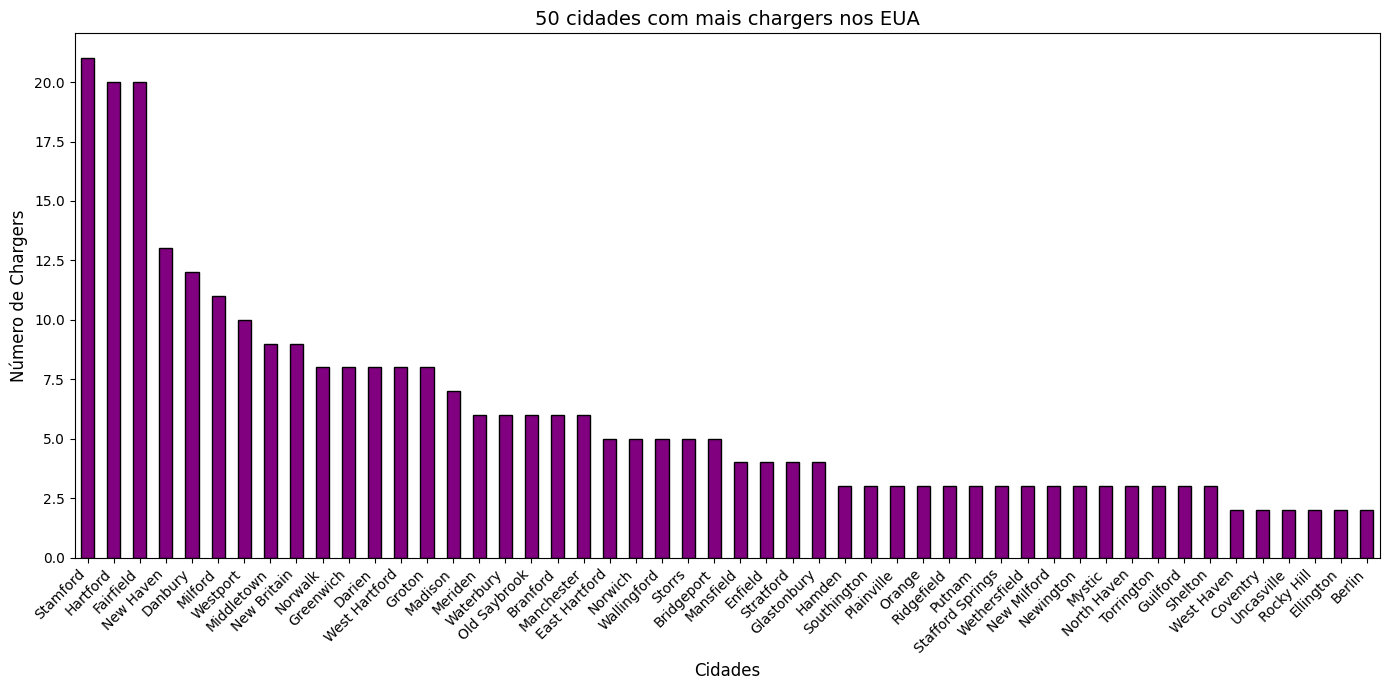

In [19]:
cidade_station = data_station['City'].value_counts().head(50)

plt.figure(figsize=(14, 7))
cidade_station.plot(kind='bar', color='purple', edgecolor='black')
plt.title('50 cidades com mais chargers nos EUA', fontsize=14)
plt.xlabel('Cidades', fontsize=12)
plt.ylabel('Número de Chargers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [20]:
chargers_24hrs = data_station[data_station['Access Days Time'] == '24 hours daily']
chargers_city = chargers_24hrs.groupby('City').size().reset_index(name='Número de estações 24hrs')

print(chargers_city)


             City  Número de estações 24hrs
0    Beacon Falls                         1
1          Berlin                         2
2         Bethany                         1
3          Bethel                         2
4        Branford                         2
..            ...                       ...
89    Willimantic                         2
90        Windham                         2
91  Windsor Locks                         2
92     Woodbridge                         2
93      Woodstock                         1

[94 rows x 2 columns]


<h3>Vamos correlacionar dois datasets (1 e 3), comparando o número de VEs com o número de carregadores por cidade (disponíveis em ambos datasets)</h3>

In [21]:
cidade_carros = data_ve['City'].value_counts().reset_index()
cidade_carros.columns = ['City', 'Número de Veículos']

cidade_station = data_station['City'].value_counts().reset_index()
cidade_station.columns = ['City', 'Número de Chargers']

merged_data = pd.merge(cidade_carros, cidade_station, on='City', how='inner')

correlacao = merged_data['Número de Veículos'].corr(merged_data['Número de Chargers'])

print(f"Correlação entre número de veículos e carregadores: {correlacao:.2f}")
print(merged_data)

Correlação entre número de veículos e carregadores: -0.24
          City  Número de Veículos  Número de Chargers
0         Kent                2782                   1
1   Ridgefield                 946                   3
2      Shelton                 400                   3
3      Clinton                 217                   1
4   Burlington                 153                   1
5     Westport                  26                  10
6       Easton                  22                   1
7   Bridgeport                   3                   5
8   Washington                   3                   1
9    Mansfield                   2                   4
10  Middletown                   2                   9
11     Madison                   2                   7
12     Norfolk                   1                   1
13   Waterford                   1                   2
14      Groton                   1                   8
15  Bloomfield                   1                   2
16     

Note-se a diferença gritante dos números... se você coloca esta tabela de comparação na frente deum possível comprador, a desistência chega em instantes.

<h1>PREVISÕES</h1>
Com esses três datsets que conseguimos explorar, podemos criar previsões incríveis, que podem ser de grande ajuda, ainda mais se mais dados fossem adicionados periodicamente. 

Correlação entre o número de carregadores e o número de VEs.

In [22]:
data_station['City'] = data_station['City'].str.strip().str.lower()
data_ve['City'] = data_ve['City'].str.strip().str.lower()

vehicles_per_city = data_ve['City'].value_counts()
chargers_per_city = data_station['City'] = data_station['City'].str.strip().str.lower()

comparacao_cidade = pd.DataFrame({
    "VEs": vehicles_per_city,
    "Chargers": chargers_per_city
}).fillna(0)

city_comparison_sorted = comparacao_cidade.sort_values(by="VEs", ascending=False).head(10)
print(city_comparison_sorted)



               VEs Chargers
seattle    29447.0        0
bellevue    8931.0        0
redmond     6478.0        0
vancouver   6193.0        0
bothell     5863.0        0
kirkland    5362.0        0
sammamish   5280.0        0
renton      4980.0        0
olympia     4299.0        0
tacoma      3722.0        0


In [23]:
charging_stations_cities_top = data_station['City'].value_counts().head(10)
vehicle_population_cities_top = data_ve['City'].value_counts().head(10)

print("Top 10 cidades com mais carregadores:\n", charging_stations_cities_top)
print("\nTop 10 cidades com mais veículos elétricos:\n", vehicle_population_cities_top)

Top 10 cidades com mais carregadores:
 City
stamford       21
hartford       20
fairfield      20
new haven      13
danbury        12
milford        11
westport       10
middletown     10
new britain     9
norwalk         8
Name: count, dtype: int64

Top 10 cidades com mais veículos elétricos:
 City
seattle      29447
bellevue      8931
redmond       6478
vancouver     6193
bothell       5863
kirkland      5362
sammamish     5280
renton        4980
olympia       4299
tacoma        3722
Name: count, dtype: int64


PREVISÃO - Esse código tenta prever o consumo de energia total (kwhTotal) de uma sessão de carregamento.

In [24]:
carregamento_data = data_charging[['chargeTimeHrs', 'dollars', 'weekday', 'kwhTotal']].dropna()

carregamento_data['weekday'] = carregamento_data['weekday'].astype('category').cat.codes

X = carregamento_data[['chargeTimeHrs', 'dollars', 'weekday']]  
y = carregamento_data['kwhTotal']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_energy = RandomForestRegressor(n_estimators=100, random_state=42)
model_energy.fit(X_train, y_train)

y_pred = model_energy.predict(X_test)
mse_energy = mean_squared_error(y_test, y_pred)

mse_energy  

7.4135161920360835

PREVISÃO 2 - Está medindo o número total de sessões de carregamento em uma combinação específica de dia da semana (weekday) e hora do dia (hora)

In [25]:
data_charging['weekday'] = data_charging['weekday'].astype('category').cat.codes
data_charging['hora'] = pd.to_datetime(data_charging['startTime']).dt.hour

session_count_data = data_charging[['weekday', 'hora']].groupby(['weekday', 'hora']).size().reset_index(name='session_count')

X_sessions = session_count_data[['weekday', 'hora']]
y_sessions = session_count_data['session_count']

X_train_sessions, X_test_sessions, y_train_sessions, y_test_sessions = train_test_split(X_sessions, y_sessions, test_size=0.2, random_state=42)

model_sessions = RandomForestRegressor(n_estimators=100, random_state=42)
model_sessions.fit(X_train_sessions, y_train_sessions)

y_pred_sessions = model_sessions.predict(X_test_sessions)
mse_sessions = mean_squared_error(y_test_sessions, y_pred_sessions)

print(f"Erro quadrático médio (MSE) para previsão de sessões: {mse_sessions:.2f}")


Erro quadrático médio (MSE) para previsão de sessões: 256713.36


PREVISÃO 3 - Demanda de carrregamento.

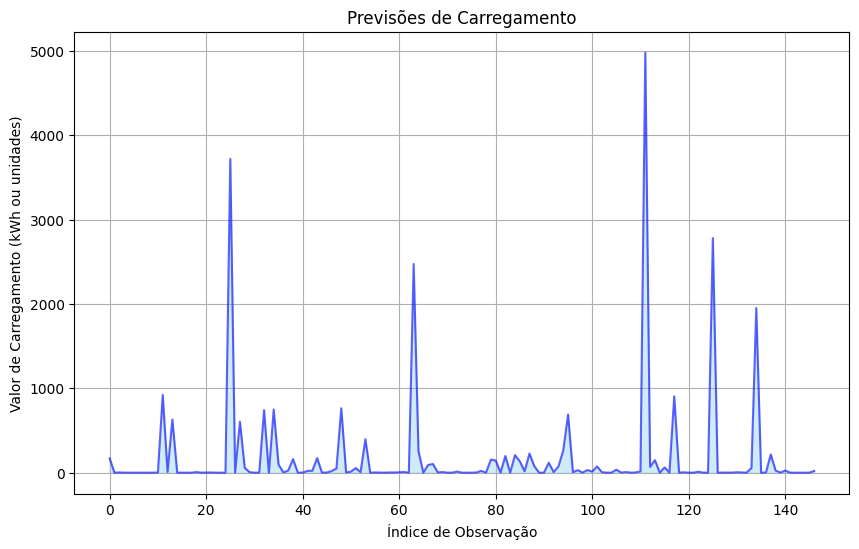

In [26]:
dados_agregados = data_ve.groupby(['State', 'City']).size().reset_index(name='Car_Count')

X = dados_agregados[['Car_Count']]  
y = dados_agregados['Car_Count']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

previsao_demanda = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.fill_between(range(len(previsao_demanda)), previsao_demanda, color="skyblue", alpha=0.4)
plt.plot(previsao_demanda, color="blue", alpha=0.6)
plt.title("Previsões de Carregamento")
plt.xlabel("Índice de Observação")
plt.ylabel("Valor de Carregamento (kWh ou unidades)")
plt.grid(True)
plt.show()

Os valores do eixo Y (Valor de Carregamento) indicam a quantidade de energia que os veículos elétricos precisam carregar ou a demanda de carregamento em diferentes momentos. Basicamente o gráfico mostra como a demanda ou necessidade de carregamento está variando ao longo do tempo. Esse gráfico pode ser útil para entender como a demanda de carregamento de veículos elétricos varia ao longo do tempo ou ao longo de diferentes observações (se não for tempo, pode ser outro tipo de sequência, como regiões, classes de veículos, etc.).